Epoch 1/10, Train Loss: 0.3938, Train Acc: 0.8817, Test Loss: 0.2515, Test Acc: 0.9232
Epoch 2/10, Train Loss: 0.1879, Train Acc: 0.9444, Test Loss: 0.1433, Test Acc: 0.9546
Epoch 3/10, Train Loss: 0.1354, Train Acc: 0.9584, Test Loss: 0.1416, Test Acc: 0.9545
Epoch 4/10, Train Loss: 0.1102, Train Acc: 0.9661, Test Loss: 0.1111, Test Acc: 0.9642
Epoch 5/10, Train Loss: 0.0925, Train Acc: 0.9711, Test Loss: 0.1032, Test Acc: 0.9678
Epoch 6/10, Train Loss: 0.0808, Train Acc: 0.9741, Test Loss: 0.0911, Test Acc: 0.9730
Epoch 7/10, Train Loss: 0.0717, Train Acc: 0.9775, Test Loss: 0.1023, Test Acc: 0.9702
Epoch 8/10, Train Loss: 0.0651, Train Acc: 0.9792, Test Loss: 0.1014, Test Acc: 0.9685
Epoch 9/10, Train Loss: 0.0590, Train Acc: 0.9804, Test Loss: 0.1016, Test Acc: 0.9680
Epoch 10/10, Train Loss: 0.0535, Train Acc: 0.9824, Test Loss: 0.0868, Test Acc: 0.9743
Epoch 1/10, Train Loss: 0.8971, Train Acc: 0.7202, Test Loss: 0.3127, Test Acc: 0.9069
Epoch 2/10, Train Loss: 0.2735, Train Acc:

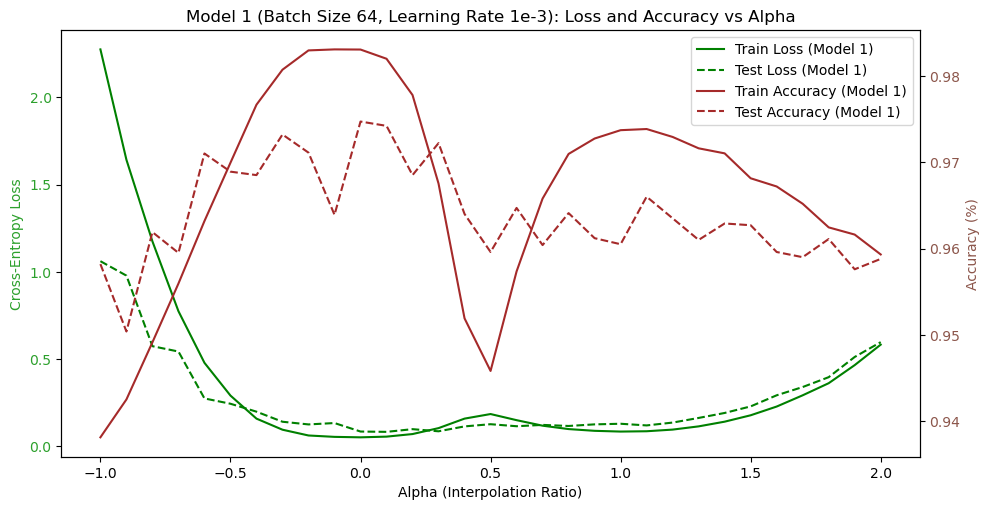

Alpha = -1.0 for Model 2
Epoch 1/1, Train Loss: 1.1945, Train Acc: 0.9372, Test Loss: 0.9896, Test Acc: 0.9501
Alpha = -0.9 for Model 2
Epoch 1/1, Train Loss: 0.8824, Train Acc: 0.9443, Test Loss: 0.7987, Test Acc: 0.9529
Alpha = -0.8 for Model 2
Epoch 1/1, Train Loss: 0.6446, Train Acc: 0.9497, Test Loss: 0.6111, Test Acc: 0.9568
Alpha = -0.7 for Model 2
Epoch 1/1, Train Loss: 0.4654, Train Acc: 0.9565, Test Loss: 0.4730, Test Acc: 0.9602
Alpha = -0.6 for Model 2
Epoch 1/1, Train Loss: 0.3347, Train Acc: 0.9608, Test Loss: 0.3905, Test Acc: 0.9594
Alpha = -0.5 for Model 2
Epoch 1/1, Train Loss: 0.2350, Train Acc: 0.9652, Test Loss: 0.2882, Test Acc: 0.9642
Alpha = -0.4 for Model 2
Epoch 1/1, Train Loss: 0.1645, Train Acc: 0.9698, Test Loss: 0.2202, Test Acc: 0.9645
Alpha = -0.3 for Model 2
Epoch 1/1, Train Loss: 0.1157, Train Acc: 0.9732, Test Loss: 0.1736, Test Acc: 0.9651
Alpha = -0.2 for Model 2
Epoch 1/1, Train Loss: 0.0895, Train Acc: 0.9761, Test Loss: 0.1345, Test Acc: 0.9666
A

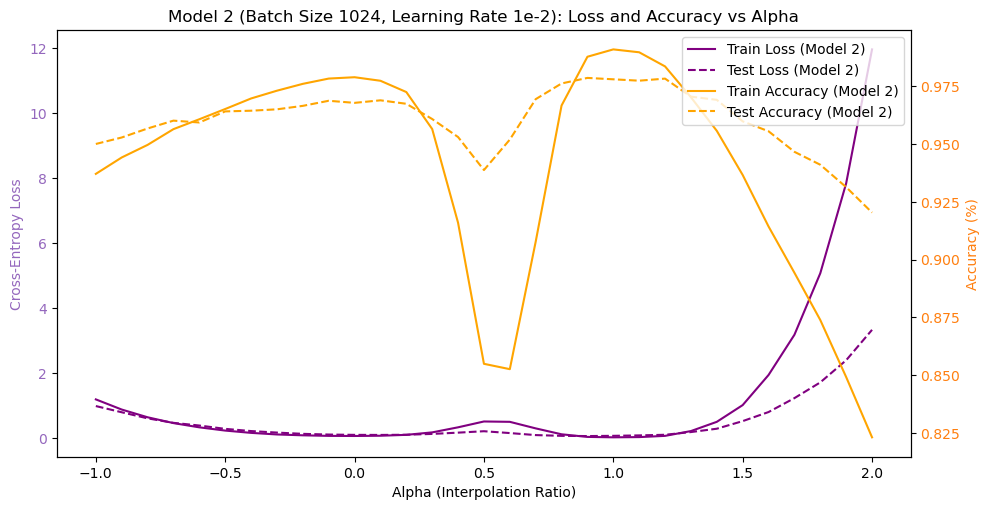

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load MNIST dataset
def load_mnist_data():
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_data = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
    test_data = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
    return train_data, test_data

train_data, test_data = load_mnist_data()
train_loader_64 = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader_64 = DataLoader(test_data, batch_size=64, shuffle=False)
train_loader_1024 = DataLoader(train_data, batch_size=1024, shuffle=True)
test_loader_1024 = DataLoader(test_data, batch_size=1024, shuffle=False)

# Define a flexible neural network model
class MLPModel(nn.Module):
    def __init__(self):
        super(MLPModel, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Train the model and evaluate performance
def train_model(model, train_loader, test_loader, optimizer, loss_func, epochs):
    train_loss_history = []
    test_loss_history = []
    train_acc_history = []
    test_acc_history = []

    model.to(device)

    for epoch in range(epochs):
        model.train()
        running_train_loss = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_func(outputs, labels)
            loss.backward()
            optimizer.step()

            running_train_loss += loss.item() * inputs.size(0)
            _, predicted_train = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted_train == labels).sum().item()

        avg_train_loss = running_train_loss / len(train_loader.dataset)
        train_loss_history.append(avg_train_loss)
        train_acc_history.append(correct_train / total_train)

        model.eval()
        running_test_loss = 0.0
        correct_test = 0
        total_test = 0

        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = loss_func(outputs, labels)
                running_test_loss += loss.item() * inputs.size(0)
                _, predicted_test = torch.max(outputs, 1)
                total_test += labels.size(0)
                correct_test += (predicted_test == labels).sum().item()

        avg_test_loss = running_test_loss / len(test_loader.dataset)
        test_loss_history.append(avg_test_loss)
        test_acc_history.append(correct_test / total_test)

        print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc_history[-1]:.4f}, "
              f"Test Loss: {avg_test_loss:.4f}, Test Acc: {test_acc_history[-1]:.4f}")

    return train_loss_history, test_loss_history, train_acc_history, test_acc_history

# Linear interpolation between two trained models
def interpolate_models(m1, m2, alpha):
    interpolated_model = MLPModel()
    m1_params, m2_params = m1.state_dict(), m2.state_dict()
    interp_params = {key: (1 - alpha) * m1_params[key] + alpha * m2_params[key] for key in m1_params.keys()}
    interpolated_model.load_state_dict(interp_params)
    return interpolated_model

# Training settings
epochs = 10
criterion = nn.CrossEntropyLoss()

# Train model m1 (batch size = 64, learning rate = 1e-3)
m1 = MLPModel().to(device)
optimizer_m1 = optim.Adam(m1.parameters(), lr=1e-3)
train_loss_64, test_loss_64, train_acc_64, test_acc_64 = train_model(m1, train_loader_64, test_loader_64, optimizer_m1, criterion, epochs)

# Train model m2 (batch size = 1024, learning rate = 1e-2)
m2 = MLPModel().to(device)
optimizer_m2 = optim.Adam(m2.parameters(), lr=1e-2)
train_loss_1024, test_loss_1024, train_acc_1024, test_acc_1024 = train_model(m2, train_loader_1024, test_loader_1024, optimizer_m2, criterion, epochs)

# Perform interpolation between models m1 and m2
alpha_values = [i / 10 for i in range(-10, 21)]  
interpolated_train_loss = []
interpolated_test_loss = []
interpolated_train_acc = []
interpolated_test_acc = []

for alpha in alpha_values:
    print(f"Alpha = {alpha}")
    interpolated_model = interpolate_models(m1, m2, alpha).to(device)
    optimizer_interp = optim.Adam(interpolated_model.parameters(), lr=1e-3)
    
    train_loss_interp, test_loss_interp, train_acc_interp, test_acc_interp = train_model(
        interpolated_model, train_loader_64, test_loader_64, optimizer_interp, criterion, epochs=1
    )
    
    interpolated_train_loss.append(train_loss_interp[-1])
    interpolated_test_loss.append(test_loss_interp[-1])
    interpolated_train_acc.append(train_acc_interp[-1])
    interpolated_test_acc.append(test_acc_interp[-1])



# Plot for Model 1 (Batch size = 64, Learning rate = 1e-3)
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting loss for Model 1
color = 'tab:green'
ax1.set_xlabel('Alpha (Interpolation Ratio)')
ax1.set_ylabel('Cross-Entropy Loss', color=color)
ax1.plot(alpha_values, interpolated_train_loss, label='Train Loss (Model 1)', color='green', linestyle='-')
ax1.plot(alpha_values, interpolated_test_loss, label='Test Loss (Model 1)', color='green', linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

# Plotting accuracy for Model 1 
ax2 = ax1.twinx()
color = 'tab:brown'
ax2.set_ylabel('Accuracy (%)', color=color)
ax2.plot(alpha_values, interpolated_train_acc, label='Train Accuracy (Model 1)', color='brown', linestyle='-')
ax2.plot(alpha_values, interpolated_test_acc, label='Test Accuracy (Model 1)', color='brown', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Model 1 (Batch Size 64, Learning Rate 1e-3): Loss and Accuracy vs Alpha')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()

# Plot for Model 2 (Batch size = 1024, Learning rate = 1e-2)
interpolated_train_loss.clear()
interpolated_test_loss.clear()
interpolated_train_acc.clear()
interpolated_test_acc.clear()

for alpha in alpha_values:
    print(f"Alpha = {alpha} for Model 2")
    interpolated_model = interpolate_models(m2, m1, alpha).to(device)  
    optimizer_interp = optim.Adam(interpolated_model.parameters(), lr=1e-3)
    
    train_loss_interp, test_loss_interp, train_acc_interp, test_acc_interp = train_model(
        interpolated_model, train_loader_1024, test_loader_1024, optimizer_interp, criterion, epochs=1
    )
    
    interpolated_train_loss.append(train_loss_interp[-1])
    interpolated_test_loss.append(test_loss_interp[-1])
    interpolated_train_acc.append(train_acc_interp[-1])
    interpolated_test_acc.append(test_acc_interp[-1])

# Plot for Model 2 (Batch size = 1024, Learning rate = 1e-2)
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plotting loss for Model 2
color = 'tab:purple'
ax1.set_xlabel('Alpha (Interpolation Ratio)')
ax1.set_ylabel('Cross-Entropy Loss', color=color)
ax1.plot(alpha_values, interpolated_train_loss, label='Train Loss (Model 2)', color='purple', linestyle='-')
ax1.plot(alpha_values, interpolated_test_loss, label='Test Loss (Model 2)', color='purple', linestyle='--')
ax1.tick_params(axis='y', labelcolor=color)

# Plotting accuracy for Model 2 
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Accuracy (%)', color=color)
ax2.plot(alpha_values, interpolated_train_acc, label='Train Accuracy (Model 2)', color='orange', linestyle='-')
ax2.plot(alpha_values, interpolated_test_acc, label='Test Accuracy (Model 2)', color='orange', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Model 2 (Batch Size 1024, Learning Rate 1e-2): Loss and Accuracy vs Alpha')
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.show()
